# Human Learning with iris data



TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  1

In [3]:
# read the iris data into a pandas DataFrame, including column names
df=pd.read_csv('iris.csv')

# 2

In [4]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:

#display the first few rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:

#display the last few rows

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Task 3

In [7]:
# use groupby to look for differences between the species
f = pd.read_csv('iris.csv')  

# Group the data by the "species" column
grouped = df.groupby('species')
means = grouped.mean()
print("Mean values for each species:")
print(means)

# Compute the maximum value of each numerical column for each species
max_values = grouped.max()
print("Maximum values for each species:")
print(max_values)

# Compute the count of samples for each species
counts = grouped.size()
print("Count of samples for each species:")
print(counts)

Mean values for each species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
Maximum values for each species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.8          4.4           1.9          0.6
versicolor           7.0          3.4           5.1          1.8
virginica            7.9          3.8           6.9          2.5
Count of samples for each species:
species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [8]:
# use sorting to look for differences between the species
# türlerin sütunlarını sırala
sorted_df = df.sort_values(by='species')

# datayı görüntüle
print(sorted_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
27            5.2          3.5           1.5          0.2     setosa
28            5.2          3.4           1.4          0.2     setosa
29            4.7          3.2           1.6          0.2     setosa
30            4.8          3.1           1.6          0.2     setosa
..            ...          ...           ...          ...        ...
119           6.0          2.2           5.0          1.5  virginica
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
111           6.4          2.7           5.3          1.9  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


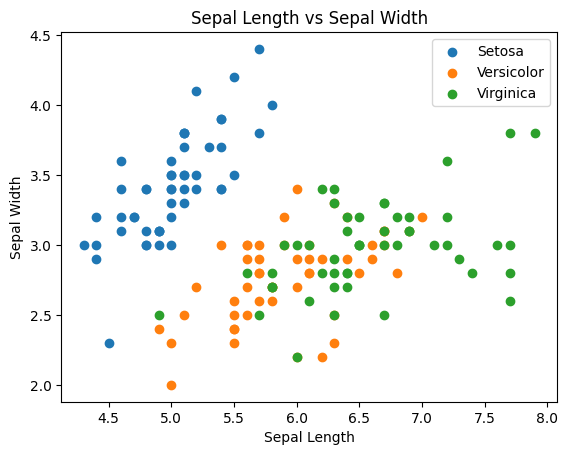

In [9]:
# use plotting to look for differences between the species
# Create separate DataFrames for each species
setosa_df = df[df['species'] == 'setosa']
versicolor_df = df[df['species'] == 'versicolor']
virginica_df = df[df['species'] == 'virginica']

# Create a scatter plot for sepal length vs sepal width
plt.scatter(setosa_df['sepal_length'], setosa_df['sepal_width'], label='Setosa')
plt.scatter(versicolor_df['sepal_length'], versicolor_df['sepal_width'], label='Versicolor')
plt.scatter(virginica_df['sepal_length'], virginica_df['sepal_width'], label='Virginica')

# Set plot labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Add a legend
plt.legend()

# Show the plot
plt.show()

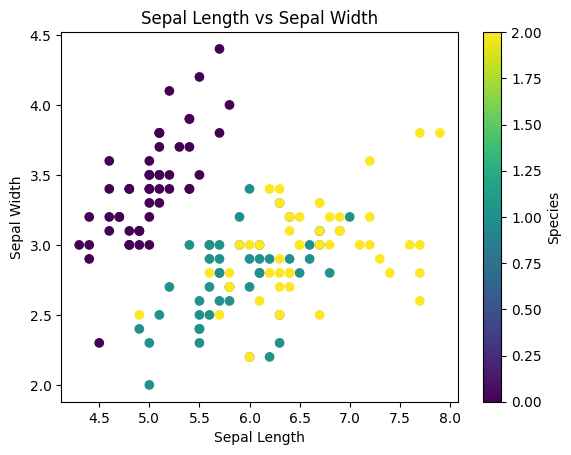

In [10]:
# map species to a numeric value so that plots can be colored by category

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('iris.csv')

# Map species to numeric values
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_numeric'] = df['species'].map(species_map)

# Create a scatter plot colored by category
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species_numeric'], cmap='viridis')

# Set plot labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Add a colorbar
plt.colorbar(label='Species')

# Show the plot
plt.show()

## Task 4

In [11]:
# Come up with a set of rules that could be used to predict species based upon measurements.
def predict_species(row):
    sepal_length = row['sepal_length']
    sepal_width = row['sepal_width']
    petal_length = row['petal_length']
    petal_width = row['petal_width']
    
    if petal_length < 2.5:
        return 'setosa'
    elif sepal_length < 6.0 and petal_width < 1.7:
        return 'versicolor'
    else:
        return 'virginica'

# Apply the predict_species function to each row of the DataFrame
df['predicted_species'] = df.apply(predict_species, axis=1)



predict_species(df.iloc[0])


'setosa'

In [17]:
# define function that accepts a row of data and returns a predicted species
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Read the CSV file into a DataFrame
df = pd.read_csv('iris.csv')

# Train a logistic regression model
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
model = LogisticRegression()
model.fit(X, y)

# Function to predict species
def predict_species(row):
    # Preprocess the input row if needed
    # For example, if the row is a dictionary, you can convert it to a DataFrame

    # Extract the features from the row
    features = [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]
    
    # Make the prediction
    predicted_species = model.predict([features])[0]
    
    return predicted_species

In [12]:
def predict_species(row):
    sepal_length = row['sepal_length']
    sepal_width = row['sepal_width']
    petal_length = row['petal_length']
    petal_width = row['petal_width']
    
    if petal_length < 2.5:
        return 'setosa'
    elif sepal_length < 6.0 and petal_width < 1.7:
        return 'versicolor'
    else:
        return 'virginica'

# Apply the predict_species function to each row of the DataFrame
df['predicted_species'] = df.apply(predict_species, axis=1)

In [13]:
predict_species(df.iloc[0])

'setosa'